## Antenna Position Measurement

Author: Tim Molteno. tim@elec.ac.nz.

The antennas are laid out on tiles, and these tiles are placed on site. Once this is done, a survey is needed to refine the positions of each antenna in the array.

Three reference posts are placed. The first is at the centre of the array, the second approximately 2.5 meters due north. The first and second post defines the $y$ axis. The third post is placed approximately 2.5 meters east of the centre, and reasonably close to at right angles to the $y$ axis.

The first reference point has coordinates (0,0). The second reference point has coordinates (0, y) and the third is not known, but must be established by measurement.

All measurements are made from the height of the antennas on the reference points.

In [1]:
import numpy as np
from scipy.optimize import minimize 

In [2]:
x0 = [0,0]
x1 = [0, 2209]

### Locating the third reference point

The distances from reference point 2 to the other two reference points (0,1) are measured (in mm)

In [ ]:
d_0_2 = 2047
d_1_2 = 3020

Now a least squares estimator is used to work out the x-y coordinates of the third reference point.

In [3]:
def dist(a,b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def f(x):
    return (dist(x0, x) - d_0_2)**2 + (dist(x1, x) - d_1_2)**2

initial_guess = [2047, 0]
res = minimize(f, initial_guess)
x2 = res.x

In [4]:
reference_points = [x1, x0, x2]
reference_points

[[0, 2209], [0, 0], array([ 2046.96807079,   -11.43277996])]

### Finding the antennas

This is done by measuring the distance from each antenna to the three reference points x0, x1 and x2.

In [5]:
n_ant = 24
m = np.zeros((24,3))

In [6]:
m[0,:] = [1563, 855, 2618]
m[1,:] = [1407, 825, 2355]
m[2,:] = [1750, 765, 2644]
m[3,:] = [839, 1373, 2416]
m[4,:] = [1151, 1422, 2986]
m[5,:] = [842, 1410, 2662]
m[6,:] = [2527, 1119, 929]
m[7,:] = [2274, 1200, 915]
m[8,:] = [2715, 1261, 824]
m[9,:] = [1684, 1064, 1457]
m[10,:] = [2238, 546, 1501]
m[11,:] = [1834, 805, 1493]
m[12,:] = [3320, 1111, 2370]
m[13,:] = [3385, 1192, 2131]
m[14,:] = [3446, 1247, 2555]
m[15,:] = [3063, 1048, 1531]
m[16,:] = [2760, 550, 2096]
m[17,:] = [2873, 784, 1689]
m[18,:] = [2342, 934, 2979]
m[19,:] = [2638, 1142, 3179]
m[20,:] = [2186, 993, 3020]
m[21,:] = [3130, 1260, 3140]
m[22,:] = [2545, 565, 2544]
m[23,:] = [2942, 1000, 2891]

In [7]:
#Initial Guesses are from json
import requests
import json

pos_url = "https://tart.elec.ac.nz/signal/api/v1/imaging/antenna_positions"

def get_data(path):
    server = "https://tart.elec.ac.nz/signal"

    r = requests.get('{}/{}'.format(server, path))
    return json.loads(r.text)

def get_pos():
    return np.array(get_data('api/v1/imaging/antenna_positions'))

current_pos = get_pos()
current_pos


array([[-0.16674626,  0.83926973,  0.        ],
       [ 0.15281671,  0.81138589,  0.        ],
       [-0.29700909,  0.70509971,  0.        ],
       [ 0.57166882,  1.24897348,  0.        ],
       [-0.13757589,  1.41472007,  0.        ],
       [ 0.32087803,  1.37318691,  0.        ],
       [ 1.01655214, -0.46882273,  0.        ],
       [ 1.18460541, -0.19466385,  0.        ],
       [ 1.08012255, -0.6515898 ,  0.        ],
       [ 0.99613714,  0.37536222,  0.        ],
       [ 0.52094819, -0.16784811,  0.        ],
       [ 0.77635267,  0.2167407 ,  0.        ],
       [-0.4621337 , -1.01061439,  0.        ],
       [-0.19670087, -1.17624775,  0.        ],
       [-0.64174045, -1.06898746,  0.        ],
       [ 0.37797358, -0.97886923,  0.        ],
       [-0.18511602, -0.51833682,  0.        ],
       [ 0.20654109, -0.75610501,  0.        ],
       [-0.84278599,  0.40241245,  0.        ],
       [-1.11251412,  0.25626616,  0.        ],
       [-0.80143781,  0.58622302,  0.   

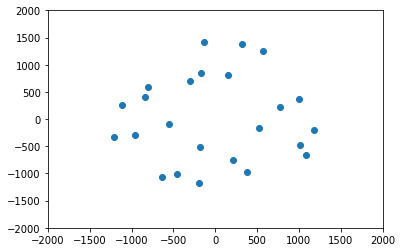

In [8]:
initial_guess = np.zeros(2*n_ant)

for i in range(n_ant):
    initial_guess[2*i:2*i+2] = current_pos[i][0:2]*1000
    #print(current_pos[i][0:2]*1000)
initial_guess

pos_i = current_pos*1000
import matplotlib.pyplot as plt
plt.scatter(pos_i[:,0], pos_i[:,1])
plt.xlim(-2000,2000)
plt.ylim(-2000,2000)
plt.show()

In [9]:
def f(x):
    ret = 0
    for i in range(n_ant):
        for j in range(3):
            p = [x[2*i],x[2*i+1]]
            ret += (dist(reference_points[j], p) - m[i,j])**2
    return ret

print(f(initial_guess))
res = minimize(f, initial_guess)
res

3411328.31518


      fun: 32.160056269667926
 hess_inv: array([[ 0.2946435 ,  0.02120059,  0.09454364, ...,  0.18697445,
         0.31788384, -0.3197244 ],
       [ 0.02120059,  0.07272489, -0.00096405, ...,  0.02710196,
         0.0513227 , -0.09185489],
       [ 0.09454364, -0.00096405,  0.12357619, ...,  0.08690188,
         0.03530764, -0.04157134],
       ..., 
       [ 0.18697445,  0.02710196,  0.08690188, ...,  0.19583251,
         0.26934106, -0.18633359],
       [ 0.31788384,  0.0513227 ,  0.03530764, ...,  0.26934106,
         0.90710054, -0.49866779],
       [-0.3197244 , -0.09185489, -0.04157134, ..., -0.18633359,
        -0.49866779,  0.83659813]])
      jac: array([  1.47819519e-05,   3.43322754e-05,   1.43051147e-06,
        -9.53674316e-07,   1.43051147e-06,  -4.76837158e-07,
         1.19209290e-05,   1.23977661e-05,   1.04904175e-05,
         7.62939453e-06,  -9.53674316e-07,  -9.53674316e-06,
         4.29153442e-06,  -9.53674316e-07,  -2.57492065e-05,
        -2.76565552e-05,  -1.

The optimized positions are now known.

In [10]:
pos = res.x.reshape((24,2))
pos

array([[ -467.10643795,   716.95500445],
       [ -159.71634223,   810.30413613],
       [ -538.08115987,   543.77684569],
       [   66.14022252,  1371.98030351],
       [ -654.13109108,  1262.21216365],
       [ -213.47586306,  1394.16820878],
       [ 1118.33585422,   -56.97044365],
       [ 1172.17166935,   259.8430332 ],
       [ 1245.1138546 ,  -203.3819925 ],
       [  785.23723459,   718.53157375],
       [  545.70924   ,    38.43417428],
       [  639.76701475,   489.53626281],
       [  -52.94193561, -1110.16183524],
       [  255.2326478 , -1165.33724169],
       [ -198.03723354, -1231.24224944],
       [  715.13335894,  -767.93745977],
       [   21.38590115,  -550.24834224],
       [  473.34891585,  -624.84387213],
       [ -931.61343872,    60.28627326],
       [-1128.08558873,  -175.67238529],
       [ -962.0310572 ,   246.06998176],
       [-1004.91356482,  -756.39665198],
       [ -482.86815159,  -290.44619064],
       [ -777.54827876,  -628.49753864]])

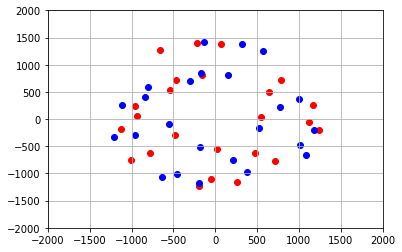

In [11]:
plt.scatter(pos[:,0], pos[:,1], color='red')
plt.scatter(pos_i[:,0], pos_i[:,1], color='blue')

plt.xlim(-2000,2000)
plt.ylim(-2000,2000)
plt.grid(True)
plt.show()

In [18]:
result = np.zeros((n_ant, 3))
result[:,:-1] = np.round(pos/1000.0, 3)
result

array([[-0.467,  0.717,  0.   ],
       [-0.16 ,  0.81 ,  0.   ],
       [-0.538,  0.544,  0.   ],
       [ 0.066,  1.372,  0.   ],
       [-0.654,  1.262,  0.   ],
       [-0.213,  1.394,  0.   ],
       [ 1.118, -0.057,  0.   ],
       [ 1.172,  0.26 ,  0.   ],
       [ 1.245, -0.203,  0.   ],
       [ 0.785,  0.719,  0.   ],
       [ 0.546,  0.038,  0.   ],
       [ 0.64 ,  0.49 ,  0.   ],
       [-0.053, -1.11 ,  0.   ],
       [ 0.255, -1.165,  0.   ],
       [-0.198, -1.231,  0.   ],
       [ 0.715, -0.768,  0.   ],
       [ 0.021, -0.55 ,  0.   ],
       [ 0.473, -0.625,  0.   ],
       [-0.932,  0.06 ,  0.   ],
       [-1.128, -0.176,  0.   ],
       [-0.962,  0.246,  0.   ],
       [-1.005, -0.756,  0.   ],
       [-0.483, -0.29 ,  0.   ],
       [-0.778, -0.628,  0.   ]])

In [19]:
json_result = {}
json_result["antenna_positions"] = result.tolist()
print(json.dumps(json_result, indent=4, separators=(',', ': ')))

{
    "antenna_positions": [
        [
            -0.467,
            0.717,
            0.0
        ],
        [
            -0.16,
            0.81,
            0.0
        ],
        [
            -0.538,
            0.544,
            0.0
        ],
        [
            0.066,
            1.372,
            0.0
        ],
        [
            -0.654,
            1.262,
            0.0
        ],
        [
            -0.213,
            1.394,
            0.0
        ],
        [
            1.118,
            -0.057,
            0.0
        ],
        [
            1.172,
            0.26,
            0.0
        ],
        [
            1.245,
            -0.203,
            0.0
        ],
        [
            0.785,
            0.719,
            0.0
        ],
        [
            0.546,
            0.038,
            0.0
        ],
        [
            0.64,
            0.49,
            0.0
        ],
        [
            -0.053,
            -1.11,
            0.0
    

The position file above is in a format suitable for uploading to the telescope api